In [100]:
import numpy as np
from random import randrange
import random
from tqdm import tqdm
from matplotlib import pyplot as plt

In [104]:
import os

os.getcwd()

'C:\\Users\\Andrew\\Desktop\\Study'

In [101]:
class ShillingModel:
    matrix = []
    size_matrix = 1
    threshhold_unhappy = 2
    
    def get_random_coords(self):
        return (random.randint(0, self.size_matrix - 1), random.randint(0, self.size_matrix - 1))
    
    def __init__ (self, size_mat, count_blue, count_red):
        ## init matrix
        self.size_matrix = size_mat
        self.matrix = np.zeros((self.size_matrix, self.size_matrix))
        
        count_blue = int(count_blue * size_mat ** 2)
        count_red = int(count_red * size_mat ** 2)
        
        ## fill matrix points
        while count_red != 0 or count_blue != 0:
            it, jt = self.get_random_coords()
    
            if self.matrix[it][jt] == 0:
                if count_red != 0:
                    self.matrix[it][jt] = 1
                    count_red -= 1
                elif (count_red == 0) and (count_blue != 0):
                    self.matrix[it][jt] = 2
                    count_blue -= 1
        
        plt.imshow(self.matrix,  cmap='magma')
        plt.show()
    
    ## Creator Maksim Mikheev
    # Функция для проверки является ли эта клетка несчастливой
    def is_unhappy(self, it, jt):
        the_same_counter = 0

        if self.matrix[it, jt] != 0:  # Пустая клетка
            for ix in range(self.size_matrix):
                for jx in range(self.size_matrix):
                    if (abs(it - ix) == 1 or abs(it - ix) == 0) and (
                            abs(jt - jx) == 1 or abs(jt - jx) == 0):
                        if ix != it or jx != jt:  # Чтобы не считать саму себя
                            if self.matrix[ix][jx] == self.matrix[it][jt]:
                                the_same_counter += 1

            if the_same_counter < self.threshhold_unhappy:
                return True
        
        return False
    
    def is_not_all_happy(self):
        for it in range(self.size_matrix):
            for jt in range(self.size_matrix):
                if self.is_unhappy(it, jt):
                    return True
        return False
    
    ## находим несчастливую клетку
    def get_unhappy_coords(self):
        while self.is_not_all_happy():
            
            ## search unhappy coords
            unhappy_points = []
            
            for it in range(self.size_matrix):
                for jt in range(self.size_matrix):
                    if self.is_unhappy(it, jt):
                        unhappy_points.append((it, jt))
            
            return unhappy_points[(random.randint(0, len(unhappy_points) - 1))]
        return -1
        
    ## запоминаем все пустые клетки и выбираем любую их них
    def get_empty_coords(self):
        empty_points = []
        for it in range(self.size_matrix):
            for jt in range(self.size_matrix):
                if self.matrix[it][jt] == 0:
                    empty_points.append((it, jt))
                    
        rand_value = random.randint(0, len(empty_points) - 1)
        return empty_points[rand_value]
        
    
    def run( self, count_unhappy=2, count_iteration=15):
        
        if count_unhappy > 8:
            raise ValueError('Count neibours for unhappy point must be less 8.')
        
        self.threshhold_unhappy = count_unhappy
        
        for iteration in range(count_iteration):
            coords_unhappy = self.get_unhappy_coords()
            
            ## if all point happy
            if coords_unhappy == -1:
                break 
            else:
                coords_empty = self.get_empty_coords()
                self.matrix[coords_empty[0]][coords_empty[1]] = self.matrix[coords_unhappy[0]][coords_unhappy[1]]
                self.matrix[coords_unhappy[0]][coords_unhappy[1]] = 0
        
        plt.imshow(self.matrix,  cmap='magma')
        plt.show()

## При матрице 15x15

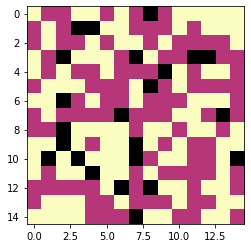

In [102]:
model2 = ShillingModel(15, 0.45, 0.45)

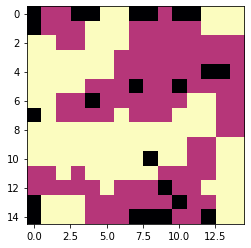

In [103]:
model2.run(3, 1000)

## При матрице 100x100

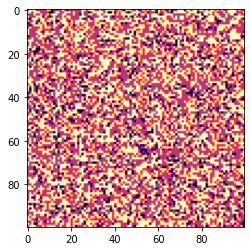

In [89]:
model = ShillingModel(100, 0.45, 0.45)

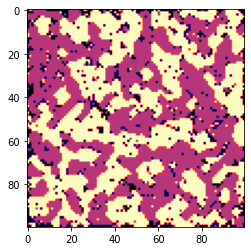

In [91]:
model.run(4, 10000)